Modules nécessaires : 

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

from HiggsML.ingestion import Ingestion
from HiggsML.datasets import download_dataset
from sample_code_submission.neural_network import NeuralNetwork
from sys import path
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from itertools import product
from numpy.random import RandomState
import warnings
import os
import sys

warnings.filterwarnings("ignore")

Charger les données : 

In [3]:
data = download_dataset(
    "blackSwan_data"
)  # change to "blackSwan_data" for the actual data

# load train set
data.load_train_set()
data_set = data.get_train_set()

2025-06-05 19:52:21,106 - HiggsML.datasets     - INFO     - Handling as dataset name: blackSwan_data
2025-06-05 19:52:21,106 - HiggsML.datasets     - INFO     - Current working directory: c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A
2025-06-05 19:52:21,118 - HiggsML.datasets     - INFO     - Total rows: 2000000
2025-06-05 19:52:21,118 - HiggsML.datasets     - INFO     - Test size: 600000
2025-06-05 19:52:21,196 - HiggsML.datasets     - INFO     - Selected train size: 1400000
2025-06-05 19:52:22,215 - HiggsML.datasets     - INFO     - Data loaded successfully


In [4]:
target = data_set["labels"]
weights = data_set["weights"]
detailed_label = data_set["detailed_labels"]
keys = np.unique(detailed_label)

Direction

In [5]:
root_dir = os.getcwd()
print("Root directory is", root_dir)
submission_dir = os.path.join(root_dir, "sample_code_submission")

# The directory where results and other outputs from the participant's code will be written
output_dir = os.path.join(root_dir, "sample_result_submission")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Root directory is c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A


Import Submission Model

In [6]:
path.append(submission_dir)
from model import Model

Testing Settings

In [7]:
TEST_SETTINGS = {
    "systematics": {  # Systematics to use
        "tes": False,  # tau energy scale
        "jes": False,  # jet energy scale
        "soft_met": False,  # soft term in MET
        "ttbar_scale": False,  # W boson scale factor
        "diboson_scale": False,  # Diboson scale factor
        "bkg_scale": False,  # Background scale factor
    },
    "num_pseudo_experiments": 25,  # Number of pseudo-experiments to run per set
    "num_of_sets": 25,  # Number of sets of pseudo-experiments to run
}

RANDOM_SEED = 42


In [8]:
test_settings = TEST_SETTINGS.copy()

random_state = np.random.RandomState(RANDOM_SEED)
test_settings["ground_truth_mus"] = (
    random_state.uniform(0.1, 3, test_settings["num_of_sets"])
).tolist()

random_settings_file = os.path.join(output_dir, "test_settings.json")
with open(random_settings_file, "w") as f:
    json.dump(test_settings, f)

Boucle sur "Ingestion" en faisant varier epochs

Graphique

In [9]:
def graphique(S, E):
    plt.plot(S, E, marker='o', linestyle='-', color='b')
    plt.title('Significance en fonction de epochs')
    plt.xlabel('epochs')
    plt.ylabel('significance')
    plt.legend()
    plt.grid(True)
    plt.show()

Significance

In [12]:

def optimization(train_data): 
    L_epochs = np.linspace(0, 50, 11)
    sigmax = 0
    epochs_max = 1
    S = []
    E = []
    for k in range(len(L_epochs)):
        ingestion = Ingestion(data)
        # initialize submission
        ingestion.init_submission(Model, "NN")
        ingestion.model.model.epochs = int(L_epochs[k])
        print(ingestion.model.model.epochs)
        ingestion.fit_submission()
        sig1 = ingestion.model.sig
        print(sig1)
        #visualisation des données :
        S.append(sig1)
        E.append(int(L_epochs[k]))
        if sig1>sigmax: 
            sigmax = sig1
            epochs_max = int(L_epochs[k])
    graphique(E, S)
    return sigmax, epochs_max



Il y a plusieurs problématique : 
Comment modifier une variable epochs de notre 

test_labels=ingestion.model.training_set["labels"],test_weights=ingestion.model.training_set["weights"]

Lancement de la boucle

A l'aide des autres programmes d'optimisations, on a obtenu batchsize : 120, 

Paramètres par défauts : 
300 000 données initiales
batchsize = 16
number_of_layers = 10
width = 300
activation = 'relu'

2025-06-05 20:00:34,657 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 20:00:34,672 - HiggsML.datasets     - INFO     - Selected train size: 100000
2025-06-05 20:00:35,090 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:00:35,132 - HiggsML.datasets     - INFO     - Selected train size: 100000


sum_signal_weights:  676.2629633902887
sum_bkg_weights:  105042.73703660969


2025-06-05 20:00:35,532 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:00:35,572 - HiggsML.datasets     - INFO     - Selected train size: 100000



Valid Data:  (100000, 28)
Valid Labels:  (100000,)
Valid Weights:  (100000,)
sum_signal_weights:  672.121271885869
sum_bkg_weights:  105046.87872811414


2025-06-05 20:00:35,982 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:00:36,047 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



sum_signal_weights:  667.6350736908161
sum_bkg_weights:  105051.36492630922
 
 
Training Data:  (100000, 28)
DEBUG: model_type = 'NN'
 Model is NN
0
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
score shape before threshold (91765,)
score shape after threshold (91765,)
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
saved_info {'beta': np.float64(6504.79144731151), 'gamma': np.float64(81.96609762064723), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x0000018280555F80>, 'jes_fit': <function jes_fitter.<locals>.fit_function at 0x0000018280557CE0>}
2865/2865 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Holdout Significance:  2.060799396529109
2867/2867 ━━━━━━━━━━━━━━━━━━━━ 3s 938us/step
Train Results: 
	 mu_hat  :  0.0014748993859612998
	 del_mu_stat  :  0.9901513406442732
	 del_mu_sys  :  0.0
	 del_mu_tot  :  0.9901513406442732
Holdout Results: 
	 mu_hat  :  1.000000000000007
	 del_mu_stat  :  0.99015134064427

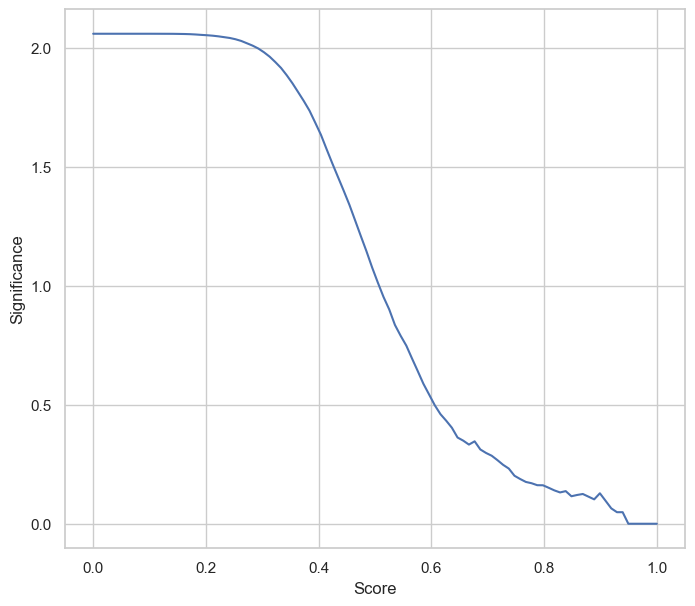

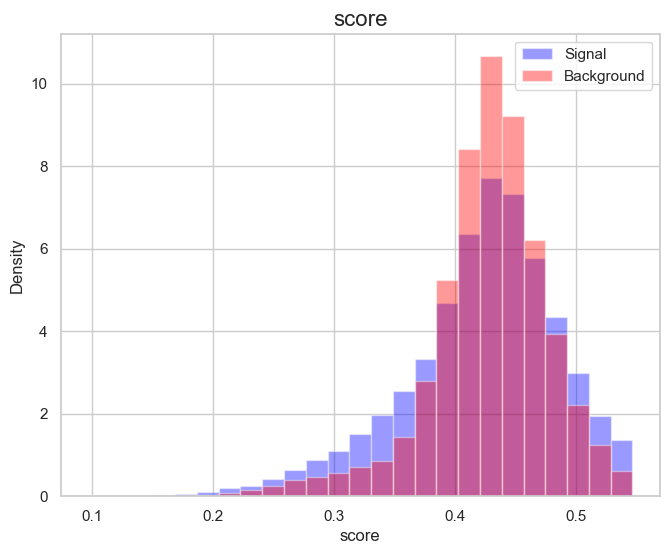

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


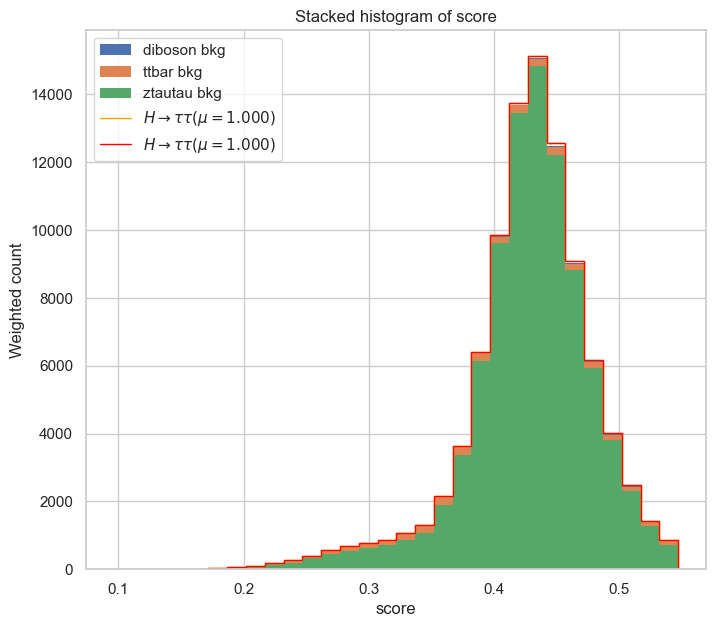

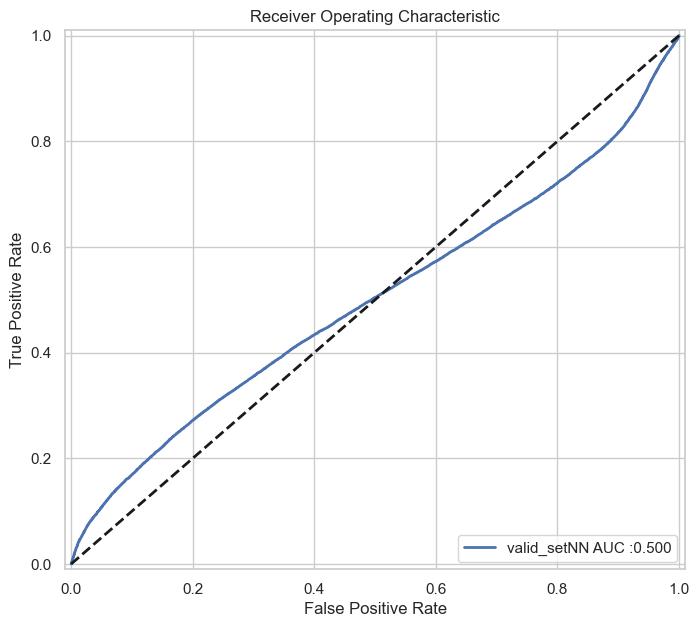

2025-06-05 20:01:03,697 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 20:01:03,712 - HiggsML.datasets     - INFO     - Selected train size: 100000


2.060799396529109


2025-06-05 20:01:04,088 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:01:04,112 - HiggsML.datasets     - INFO     - Selected train size: 100000


sum_signal_weights:  672.9490087074034
sum_bkg_weights:  105046.05099129259


2025-06-05 20:01:04,512 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:01:04,542 - HiggsML.datasets     - INFO     - Selected train size: 100000



Valid Data:  (100000, 28)
Valid Labels:  (100000,)
Valid Weights:  (100000,)
sum_signal_weights:  676.0034792634032
sum_bkg_weights:  105042.99652073657


2025-06-05 20:01:04,972 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:01:05,042 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



sum_signal_weights:  667.0686561539089
sum_bkg_weights:  105051.93134384607
 
 
Training Data:  (100000, 28)
DEBUG: model_type = 'NN'
 Model is NN
5
Epoch 1/5
6250/6250 - 13s - 2ms/step - accuracy: 0.8022 - loss: 0.9783
Epoch 2/5
6250/6250 - 11s - 2ms/step - accuracy: 0.8147 - loss: 0.9406
Epoch 3/5
6250/6250 - 11s - 2ms/step - accuracy: 0.8180 - loss: 0.9293
Epoch 4/5
6250/6250 - 11s - 2ms/step - accuracy: 0.8208 - loss: 0.9222
Epoch 5/5
6250/6250 - 10s - 2ms/step - accuracy: 0.8211 - loss: 0.9176
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
score shape before threshold (91748,)
score shape after threshold (91748,)
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
saved_info {'beta': np.float64(14211.66025748074), 'gamma': np.float64(480.63657416495533), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x0000018283563920>, 'jes_fit': <function jes_fitter.<locals>.fit_function at 0x0000018281A625C0>}
2866/2866 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


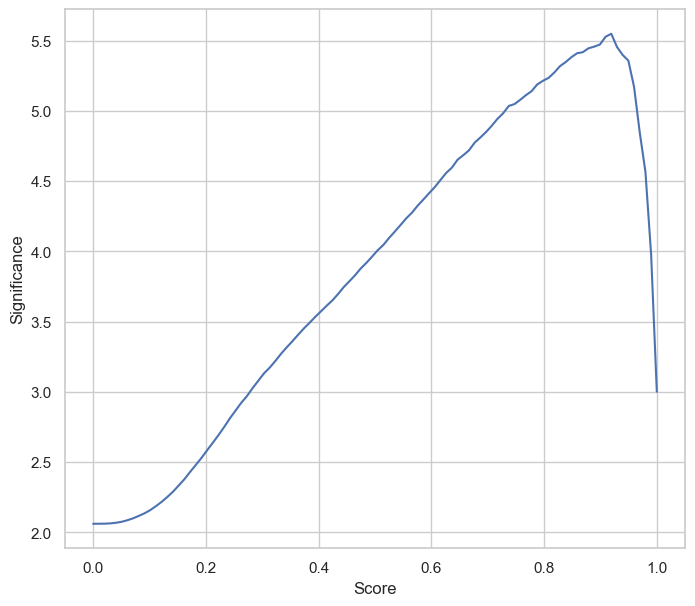

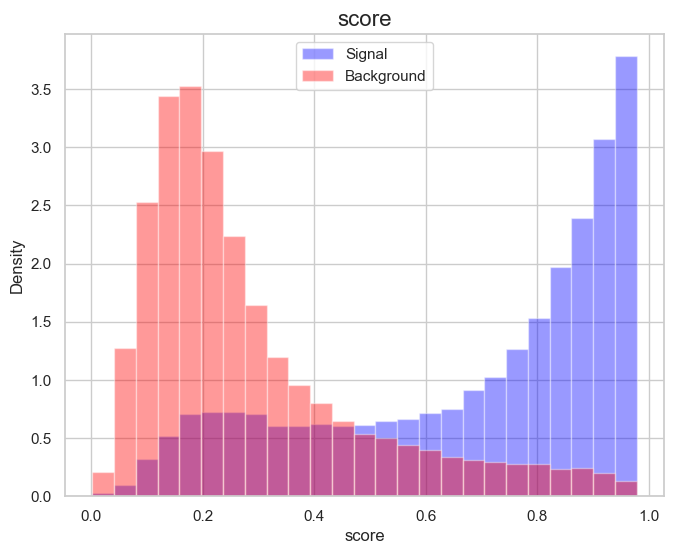

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


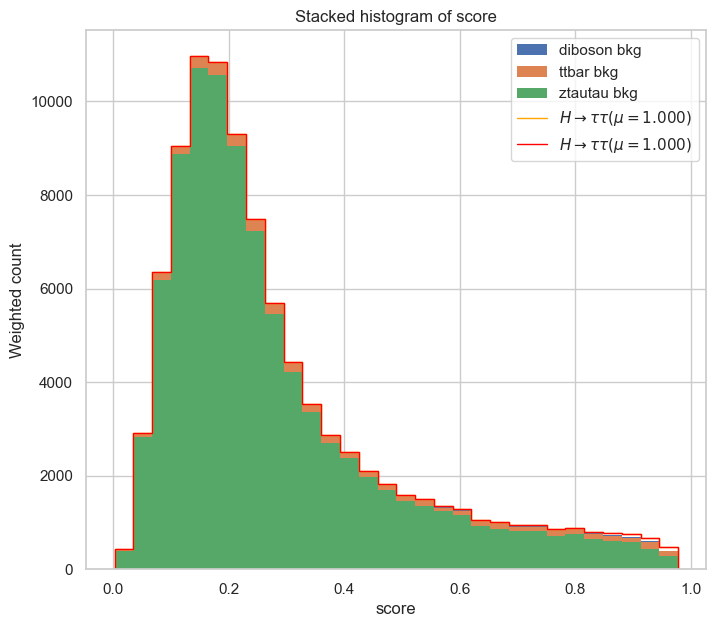

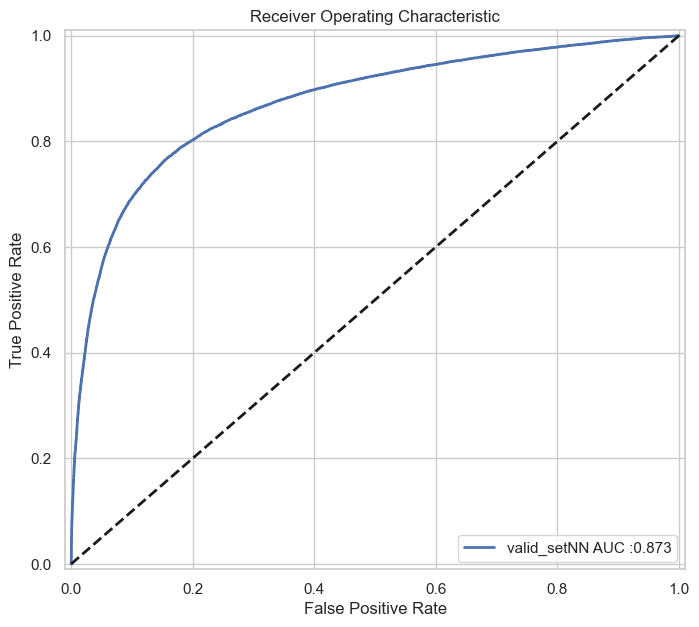

2025-06-05 20:02:27,034 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 20:02:27,061 - HiggsML.datasets     - INFO     - Selected train size: 100000


5.549150824868027


2025-06-05 20:02:27,528 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:02:27,565 - HiggsML.datasets     - INFO     - Selected train size: 100000


sum_signal_weights:  669.9274838534327
sum_bkg_weights:  105049.07251614657


2025-06-05 20:02:28,025 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:02:28,057 - HiggsML.datasets     - INFO     - Selected train size: 100000



Valid Data:  (100000, 28)
Valid Labels:  (100000,)
Valid Weights:  (100000,)
sum_signal_weights:  664.7754093068963
sum_bkg_weights:  105054.22459069306


2025-06-05 20:02:28,428 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:02:28,506 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



sum_signal_weights:  681.3678997828412
sum_bkg_weights:  105037.63210021716
 
 
Training Data:  (100000, 28)
DEBUG: model_type = 'NN'
 Model is NN
10
Epoch 1/10
6250/6250 - 12s - 2ms/step - accuracy: 0.7995 - loss: 0.9789
Epoch 2/10
6250/6250 - 10s - 2ms/step - accuracy: 0.8113 - loss: 0.9449
Epoch 3/10
6250/6250 - 10s - 2ms/step - accuracy: 0.8156 - loss: 0.9331
Epoch 4/10
6250/6250 - 10s - 2ms/step - accuracy: 0.8171 - loss: 0.9242
Epoch 5/10
6250/6250 - 11s - 2ms/step - accuracy: 0.8179 - loss: 0.9197
Epoch 6/10
6250/6250 - 11s - 2ms/step - accuracy: 0.8194 - loss: 0.9162
Epoch 7/10
6250/6250 - 11s - 2ms/step - accuracy: 0.8209 - loss: 0.9116
Epoch 8/10
6250/6250 - 11s - 2ms/step - accuracy: 0.8209 - loss: 0.9084
Epoch 9/10
6250/6250 - 11s - 2ms/step - accuracy: 0.8209 - loss: 0.9076
Epoch 10/10
6250/6250 - 11s - 2ms/step - accuracy: 0.8226 - loss: 0.9032
2866/2866 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
score shape before threshold (91687,)
score shape after threshold (91687,)
2866/2866 

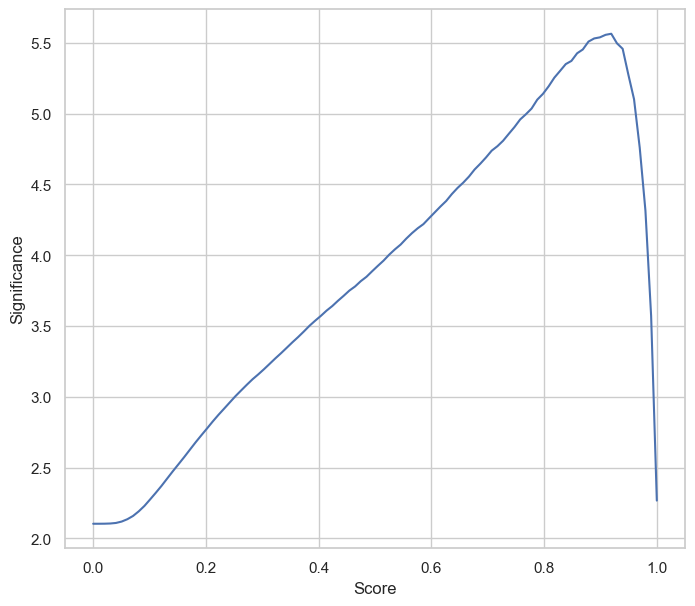

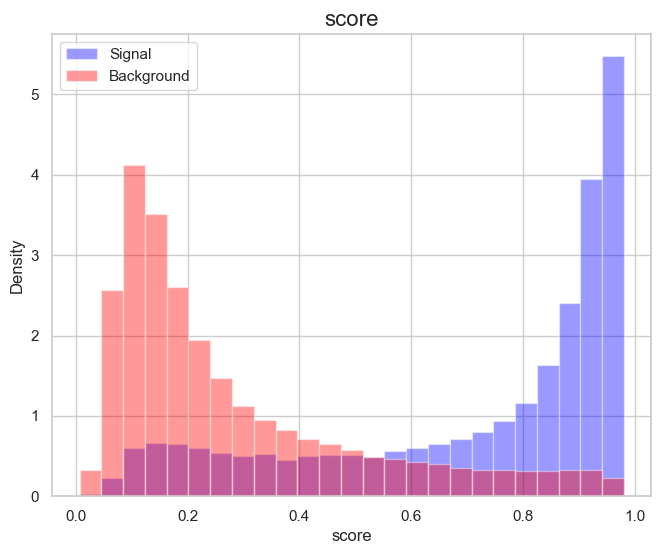

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


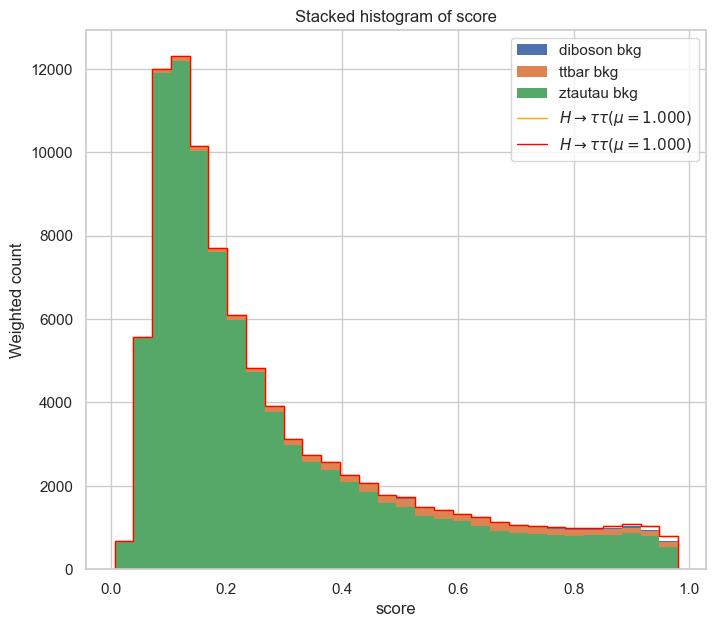

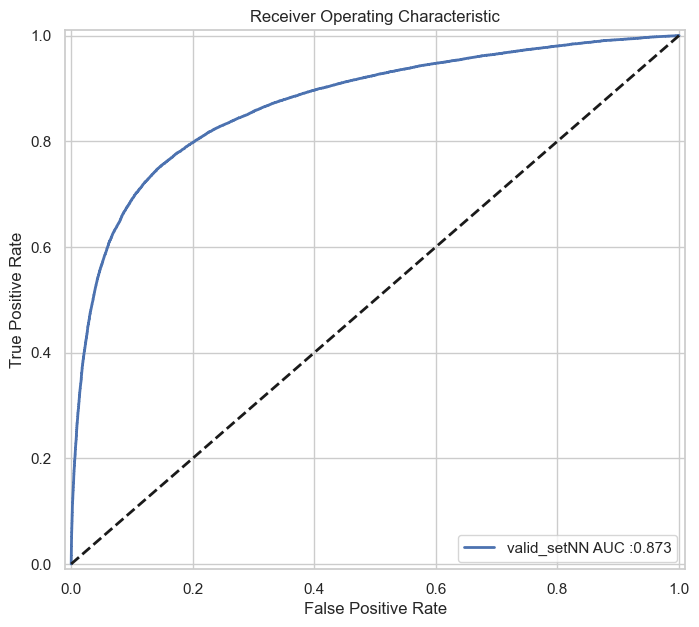

2025-06-05 20:04:45,027 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 20:04:45,040 - HiggsML.datasets     - INFO     - Selected train size: 100000


5.56479219488583


2025-06-05 20:04:45,437 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:04:45,473 - HiggsML.datasets     - INFO     - Selected train size: 100000


sum_signal_weights:  672.3380903024434
sum_bkg_weights:  105046.66190969758


2025-06-05 20:04:45,861 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:04:45,890 - HiggsML.datasets     - INFO     - Selected train size: 100000



Valid Data:  (100000, 28)
Valid Labels:  (100000,)
Valid Weights:  (100000,)
sum_signal_weights:  670.7965032810891
sum_bkg_weights:  105048.20349671891


2025-06-05 20:04:46,282 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:04:46,343 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



sum_signal_weights:  672.8676947781579
sum_bkg_weights:  105046.13230522184
 
 
Training Data:  (100000, 28)
DEBUG: model_type = 'NN'
 Model is NN
15
Epoch 1/15
6250/6250 - 12s - 2ms/step - accuracy: 0.8006 - loss: 0.9831
Epoch 2/15
6250/6250 - 10s - 2ms/step - accuracy: 0.8150 - loss: 0.9413
Epoch 3/15
6250/6250 - 11s - 2ms/step - accuracy: 0.8175 - loss: 0.9314
Epoch 4/15
6250/6250 - 11s - 2ms/step - accuracy: 0.8189 - loss: 0.9248
Epoch 5/15
6250/6250 - 10s - 2ms/step - accuracy: 0.8194 - loss: 0.9206
Epoch 6/15
6250/6250 - 10s - 2ms/step - accuracy: 0.8216 - loss: 0.9167
Epoch 7/15
6250/6250 - 10s - 2ms/step - accuracy: 0.8223 - loss: 0.9135
Epoch 8/15
6250/6250 - 10s - 2ms/step - accuracy: 0.8226 - loss: 0.9091
Epoch 9/15
6250/6250 - 10s - 2ms/step - accuracy: 0.8231 - loss: 0.9075
Epoch 10/15
6250/6250 - 10s - 2ms/step - accuracy: 0.8237 - loss: 0.9035
Epoch 11/15
6250/6250 - 10s - 2ms/step - accuracy: 0.8245 - loss: 0.9016
Epoch 12/15
6250/6250 - 11s - 2ms/step - accuracy: 0.82

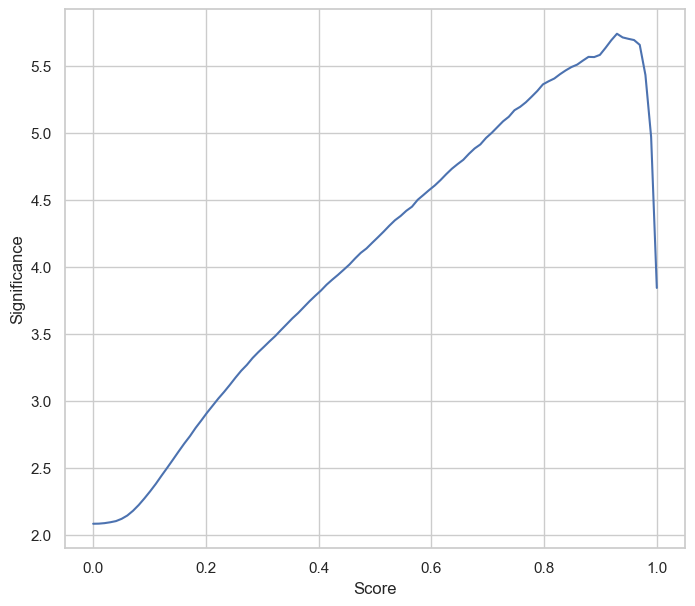

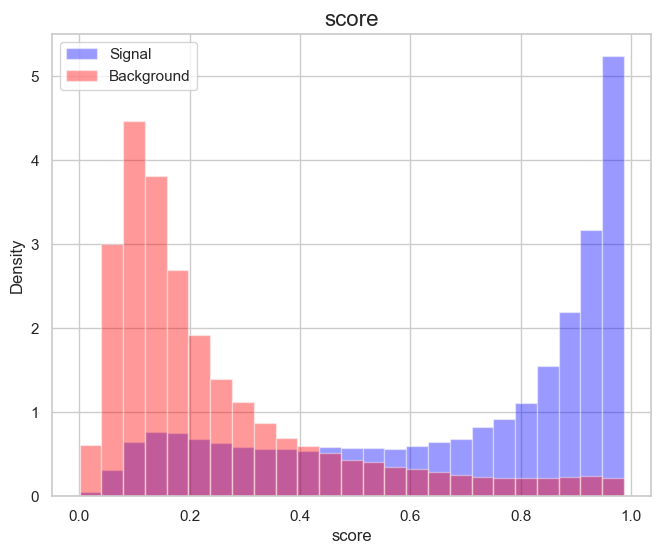

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


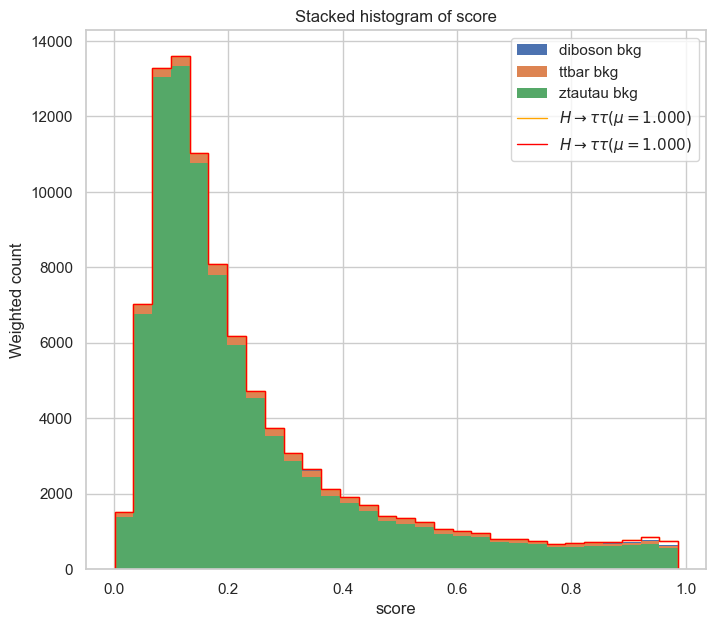

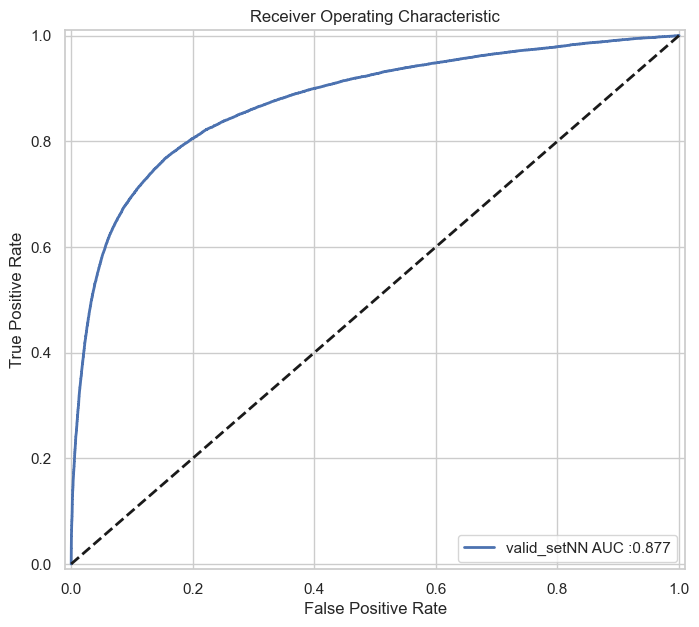

2025-06-05 20:07:51,555 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 20:07:51,569 - HiggsML.datasets     - INFO     - Selected train size: 100000


5.74066522664891


2025-06-05 20:07:51,977 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:07:52,016 - HiggsML.datasets     - INFO     - Selected train size: 100000


sum_signal_weights:  667.3226635540691
sum_bkg_weights:  105051.67733644594


2025-06-05 20:07:52,403 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:07:52,439 - HiggsML.datasets     - INFO     - Selected train size: 100000



Valid Data:  (100000, 28)
Valid Labels:  (100000,)
Valid Weights:  (100000,)
sum_signal_weights:  674.7399536263032
sum_bkg_weights:  105044.26004637373


2025-06-05 20:07:52,823 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:07:52,890 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



sum_signal_weights:  673.9547388636677
sum_bkg_weights:  105045.04526113631
 
 
Training Data:  (100000, 28)
DEBUG: model_type = 'NN'
 Model is NN
20
Epoch 1/20
6250/6250 - 12s - 2ms/step - accuracy: 0.8009 - loss: 0.9779
Epoch 2/20
6250/6250 - 11s - 2ms/step - accuracy: 0.8151 - loss: 0.9385
Epoch 3/20
6250/6250 - 12s - 2ms/step - accuracy: 0.8176 - loss: 0.9277
Epoch 4/20
6250/6250 - 11s - 2ms/step - accuracy: 0.8194 - loss: 0.9202
Epoch 5/20
6250/6250 - 11s - 2ms/step - accuracy: 0.8214 - loss: 0.9154
Epoch 6/20
6250/6250 - 11s - 2ms/step - accuracy: 0.8223 - loss: 0.9116
Epoch 7/20
6250/6250 - 11s - 2ms/step - accuracy: 0.8234 - loss: 0.9065
Epoch 8/20
6250/6250 - 12s - 2ms/step - accuracy: 0.8231 - loss: 0.9049
Epoch 9/20
6250/6250 - 12s - 2ms/step - accuracy: 0.8237 - loss: 0.9022
Epoch 10/20
6250/6250 - 12s - 2ms/step - accuracy: 0.8243 - loss: 0.8993
Epoch 11/20
6250/6250 - 12s - 2ms/step - accuracy: 0.8260 - loss: 0.8973
Epoch 12/20
6250/6250 - 12s - 2ms/step - accuracy: 0.82

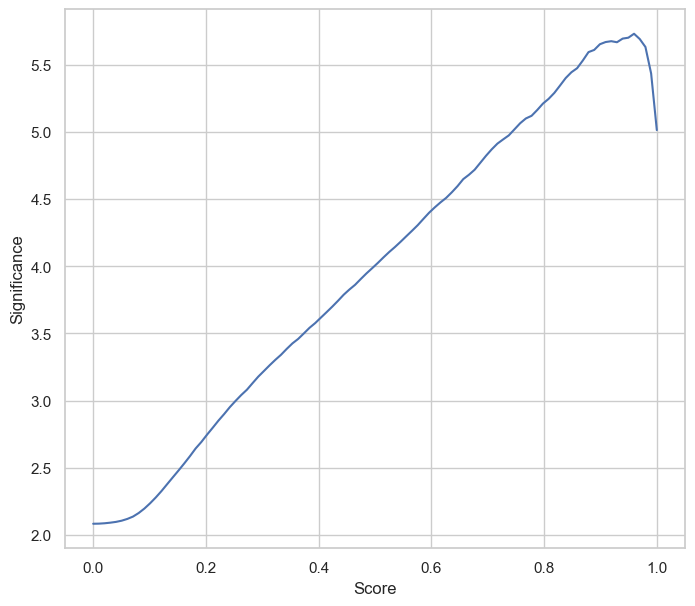

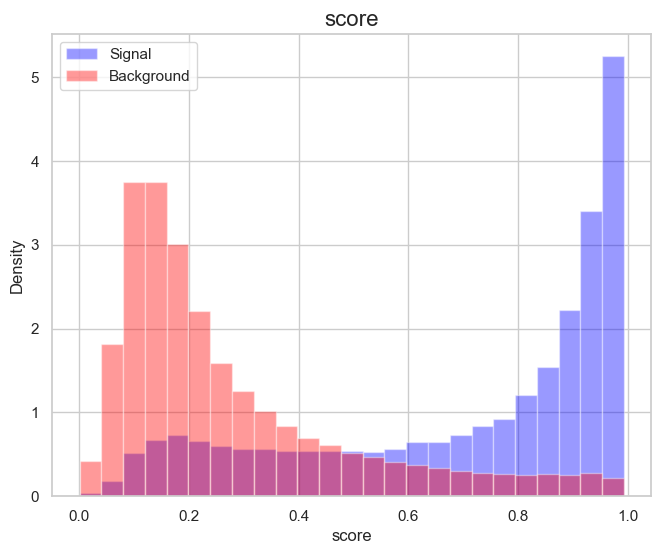

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


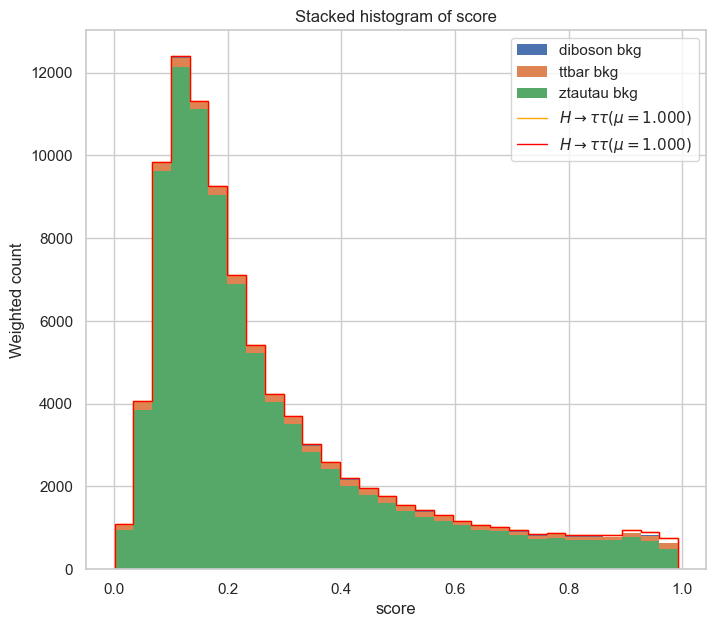

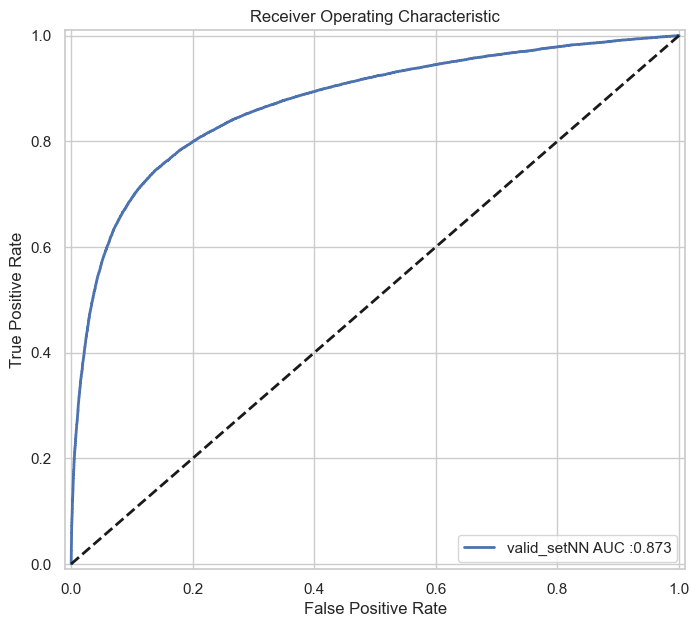

2025-06-05 20:12:09,782 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 20:12:09,801 - HiggsML.datasets     - INFO     - Selected train size: 100000


5.7313759961862765


2025-06-05 20:12:10,282 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:12:10,315 - HiggsML.datasets     - INFO     - Selected train size: 100000


sum_signal_weights:  669.991566127213
sum_bkg_weights:  105049.0084338728


2025-06-05 20:12:10,716 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:12:10,748 - HiggsML.datasets     - INFO     - Selected train size: 100000



Valid Data:  (100000, 28)
Valid Labels:  (100000,)
Valid Weights:  (100000,)
sum_signal_weights:  670.5944627727175
sum_bkg_weights:  105048.40553722726


2025-06-05 20:12:11,151 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:12:11,231 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



sum_signal_weights:  675.4236893990612
sum_bkg_weights:  105043.57631060095
 
 
Training Data:  (100000, 28)
DEBUG: model_type = 'NN'
 Model is NN
25
Epoch 1/25
6250/6250 - 12s - 2ms/step - accuracy: 0.7998 - loss: 0.9856
Epoch 2/25
6250/6250 - 11s - 2ms/step - accuracy: 0.8129 - loss: 0.9445
Epoch 3/25
6250/6250 - 11s - 2ms/step - accuracy: 0.8150 - loss: 0.9332
Epoch 4/25
6250/6250 - 11s - 2ms/step - accuracy: 0.8177 - loss: 0.9283
Epoch 5/25
6250/6250 - 11s - 2ms/step - accuracy: 0.8197 - loss: 0.9231
Epoch 6/25
6250/6250 - 11s - 2ms/step - accuracy: 0.8201 - loss: 0.9186
Epoch 7/25
6250/6250 - 11s - 2ms/step - accuracy: 0.8209 - loss: 0.9166
Epoch 8/25
6250/6250 - 11s - 2ms/step - accuracy: 0.8216 - loss: 0.9128
Epoch 9/25
6250/6250 - 11s - 2ms/step - accuracy: 0.8218 - loss: 0.9111
Epoch 10/25
6250/6250 - 11s - 2ms/step - accuracy: 0.8228 - loss: 0.9078
Epoch 11/25
6250/6250 - 10s - 2ms/step - accuracy: 0.8229 - loss: 0.9052
Epoch 12/25
6250/6250 - 11s - 2ms/step - accuracy: 0.82

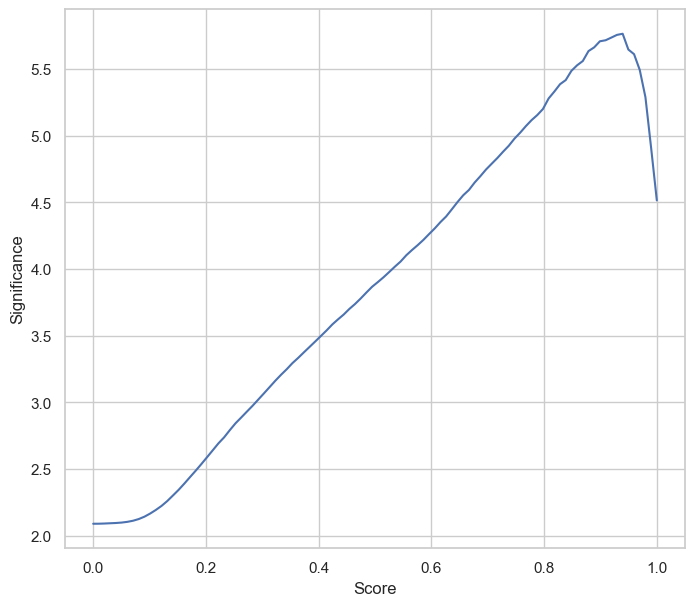

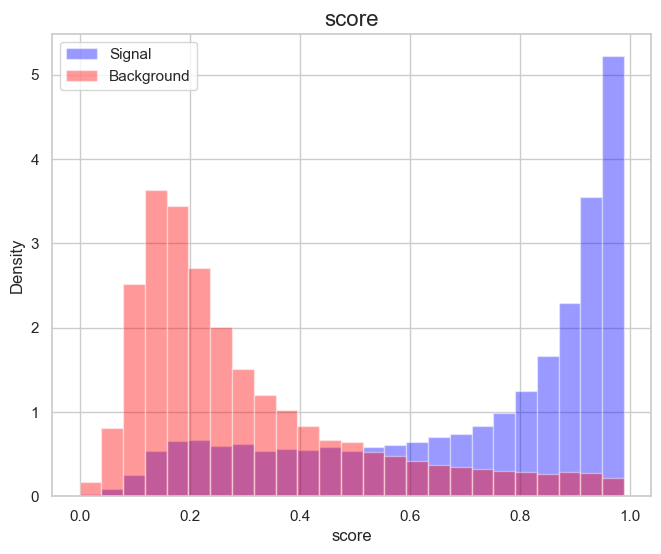

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


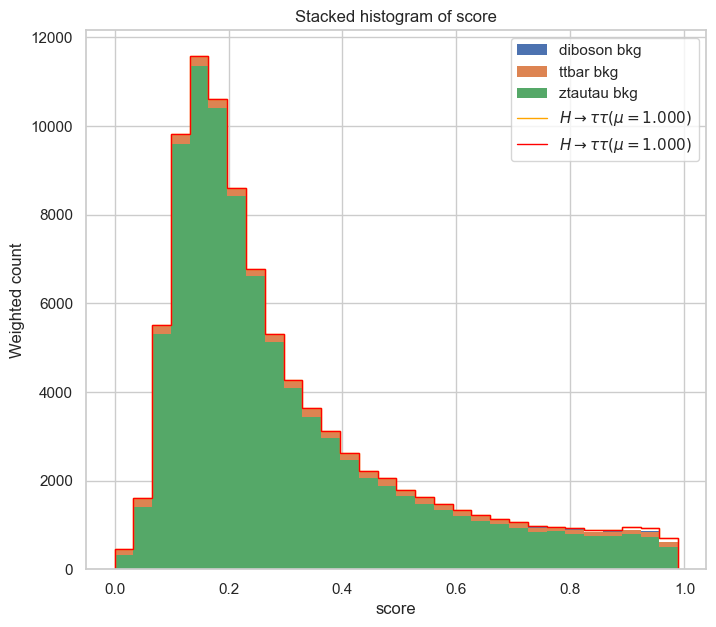

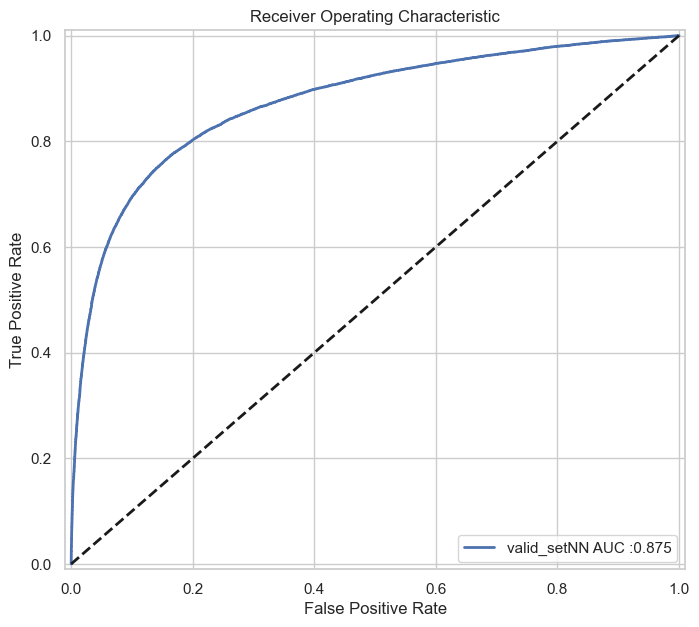

2025-06-05 20:17:10,254 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 20:17:10,267 - HiggsML.datasets     - INFO     - Selected train size: 100000


5.764439256672734


2025-06-05 20:17:10,649 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:17:10,696 - HiggsML.datasets     - INFO     - Selected train size: 100000


sum_signal_weights:  678.3749205801386
sum_bkg_weights:  105040.62507941986


2025-06-05 20:17:11,084 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:17:11,112 - HiggsML.datasets     - INFO     - Selected train size: 100000



Valid Data:  (100000, 28)
Valid Labels:  (100000,)
Valid Weights:  (100000,)
sum_signal_weights:  668.2082616575215
sum_bkg_weights:  105050.79173834244


2025-06-05 20:17:11,485 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:17:11,563 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



sum_signal_weights:  669.4479430089625
sum_bkg_weights:  105049.55205699106
 
 
Training Data:  (100000, 28)
DEBUG: model_type = 'NN'
 Model is NN
30
Epoch 1/30
6250/6250 - 12s - 2ms/step - accuracy: 0.7974 - loss: 0.9884
Epoch 2/30
6250/6250 - 11s - 2ms/step - accuracy: 0.8107 - loss: 0.9475
Epoch 3/30
6250/6250 - 11s - 2ms/step - accuracy: 0.8147 - loss: 0.9380
Epoch 4/30
6250/6250 - 11s - 2ms/step - accuracy: 0.8164 - loss: 0.9315
Epoch 5/30
6250/6250 - 11s - 2ms/step - accuracy: 0.8179 - loss: 0.9264
Epoch 6/30
6250/6250 - 11s - 2ms/step - accuracy: 0.8191 - loss: 0.9229
Epoch 7/30
6250/6250 - 11s - 2ms/step - accuracy: 0.8190 - loss: 0.9183
Epoch 8/30
6250/6250 - 11s - 2ms/step - accuracy: 0.8202 - loss: 0.9160
Epoch 9/30
6250/6250 - 11s - 2ms/step - accuracy: 0.8211 - loss: 0.9124
Epoch 10/30
6250/6250 - 11s - 2ms/step - accuracy: 0.8215 - loss: 0.9103
Epoch 11/30
6250/6250 - 11s - 2ms/step - accuracy: 0.8217 - loss: 0.9076
Epoch 12/30
6250/6250 - 11s - 2ms/step - accuracy: 0.82

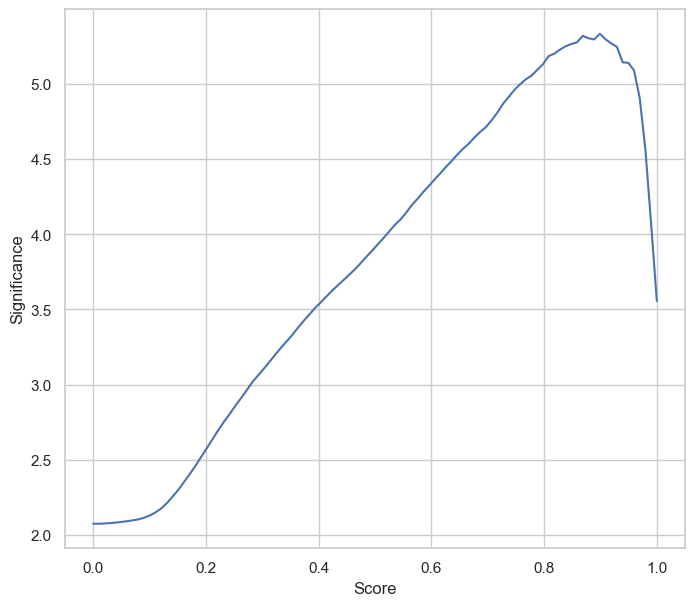

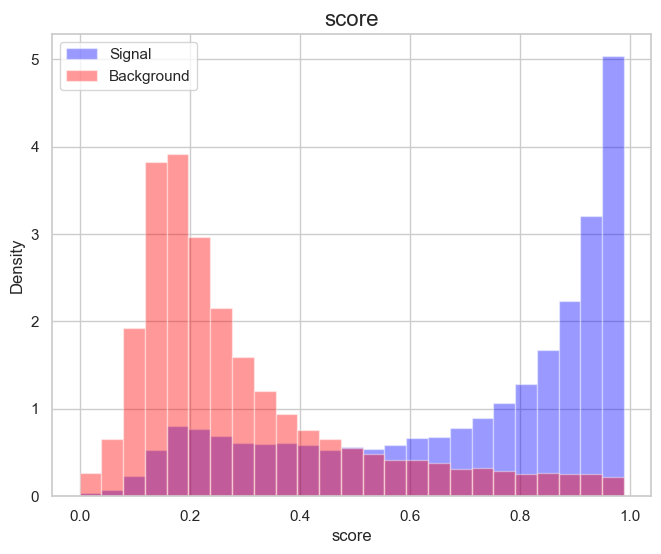

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


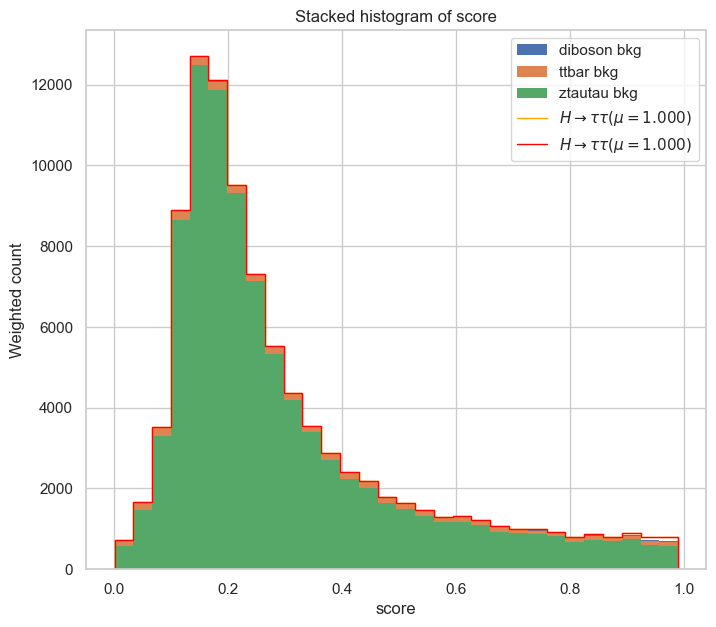

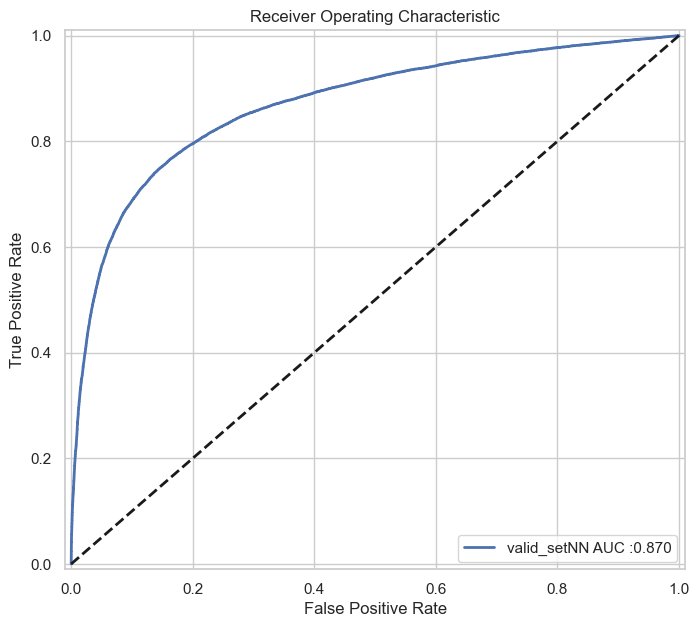

2025-06-05 20:23:03,209 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 20:23:03,222 - HiggsML.datasets     - INFO     - Selected train size: 100000


5.334579375268179


2025-06-05 20:23:03,614 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:23:03,648 - HiggsML.datasets     - INFO     - Selected train size: 100000


sum_signal_weights:  668.5171639895941
sum_bkg_weights:  105050.48283601044


2025-06-05 20:23:04,025 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:23:04,053 - HiggsML.datasets     - INFO     - Selected train size: 100000



Valid Data:  (100000, 28)
Valid Labels:  (100000,)
Valid Weights:  (100000,)
sum_signal_weights:  674.5791633340255
sum_bkg_weights:  105044.420836666


2025-06-05 20:23:04,432 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:23:04,498 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



sum_signal_weights:  672.9143209433141
sum_bkg_weights:  105046.08567905666
 
 
Training Data:  (100000, 28)
DEBUG: model_type = 'NN'
 Model is NN
35
Epoch 1/35
6250/6250 - 12s - 2ms/step - accuracy: 0.8004 - loss: 0.9826
Epoch 2/35
6250/6250 - 10s - 2ms/step - accuracy: 0.8135 - loss: 0.9439
Epoch 3/35
6250/6250 - 11s - 2ms/step - accuracy: 0.8160 - loss: 0.9318
Epoch 4/35
6250/6250 - 10s - 2ms/step - accuracy: 0.8176 - loss: 0.9274
Epoch 5/35
6250/6250 - 10s - 2ms/step - accuracy: 0.8189 - loss: 0.9223
Epoch 6/35
6250/6250 - 11s - 2ms/step - accuracy: 0.8193 - loss: 0.9202
Epoch 7/35
6250/6250 - 11s - 2ms/step - accuracy: 0.8199 - loss: 0.9154
Epoch 8/35
6250/6250 - 11s - 2ms/step - accuracy: 0.8211 - loss: 0.9130
Epoch 9/35
6250/6250 - 11s - 2ms/step - accuracy: 0.8218 - loss: 0.9094
Epoch 10/35
6250/6250 - 11s - 2ms/step - accuracy: 0.8220 - loss: 0.9081
Epoch 11/35
6250/6250 - 11s - 2ms/step - accuracy: 0.8232 - loss: 0.9041
Epoch 12/35
6250/6250 - 10s - 2ms/step - accuracy: 0.82

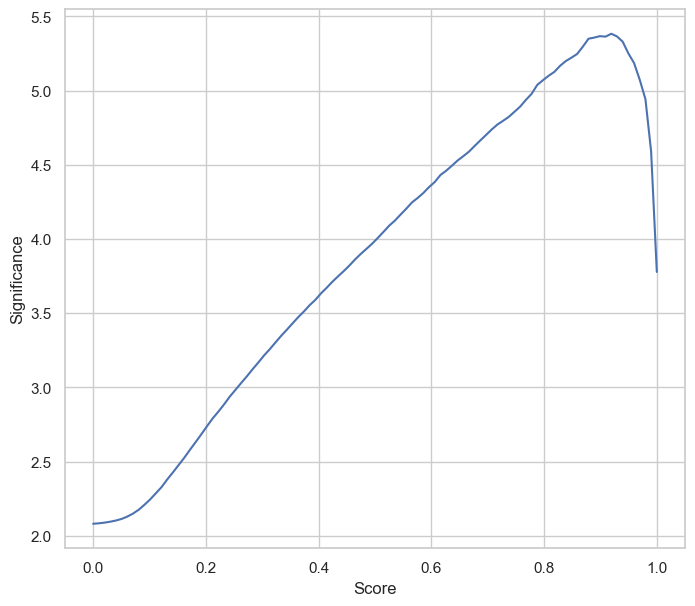

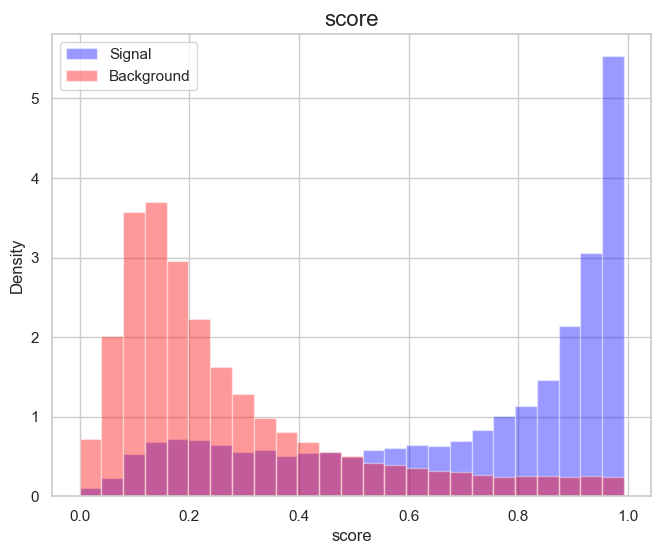

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


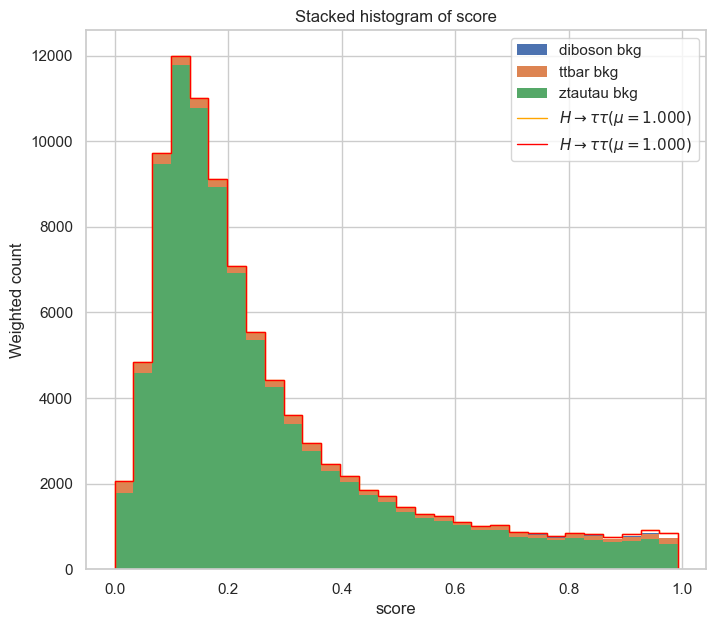

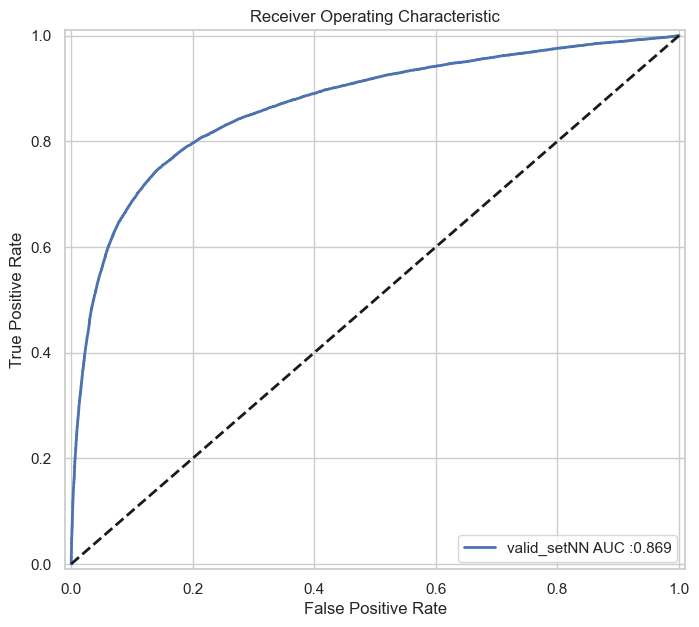

2025-06-05 20:29:46,483 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 20:29:46,501 - HiggsML.datasets     - INFO     - Selected train size: 100000


5.382537163410697


2025-06-05 20:29:46,934 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:29:46,967 - HiggsML.datasets     - INFO     - Selected train size: 100000


sum_signal_weights:  672.7509204396434
sum_bkg_weights:  105046.2490795604


2025-06-05 20:29:47,381 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:29:47,417 - HiggsML.datasets     - INFO     - Selected train size: 100000



Valid Data:  (100000, 28)
Valid Labels:  (100000,)
Valid Weights:  (100000,)
sum_signal_weights:  672.9390747666087
sum_bkg_weights:  105046.06092523337


2025-06-05 20:29:47,849 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:29:47,916 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



sum_signal_weights:  670.3132507627815
sum_bkg_weights:  105048.68674923721
 
 
Training Data:  (100000, 28)
DEBUG: model_type = 'NN'
 Model is NN
40
Epoch 1/40
6250/6250 - 14s - 2ms/step - accuracy: 0.8004 - loss: 0.9745
Epoch 2/40
6250/6250 - 12s - 2ms/step - accuracy: 0.8135 - loss: 0.9372
Epoch 3/40
6250/6250 - 12s - 2ms/step - accuracy: 0.8158 - loss: 0.9279
Epoch 4/40
6250/6250 - 11s - 2ms/step - accuracy: 0.8170 - loss: 0.9200
Epoch 5/40
6250/6250 - 11s - 2ms/step - accuracy: 0.8196 - loss: 0.9155
Epoch 6/40
6250/6250 - 11s - 2ms/step - accuracy: 0.8196 - loss: 0.9117
Epoch 7/40
6250/6250 - 11s - 2ms/step - accuracy: 0.8220 - loss: 0.9092
Epoch 8/40
6250/6250 - 11s - 2ms/step - accuracy: 0.8214 - loss: 0.9059
Epoch 9/40
6250/6250 - 11s - 2ms/step - accuracy: 0.8222 - loss: 0.9023
Epoch 10/40
6250/6250 - 11s - 2ms/step - accuracy: 0.8231 - loss: 0.9005
Epoch 11/40
6250/6250 - 11s - 2ms/step - accuracy: 0.8242 - loss: 0.8971
Epoch 12/40
6250/6250 - 11s - 2ms/step - accuracy: 0.82

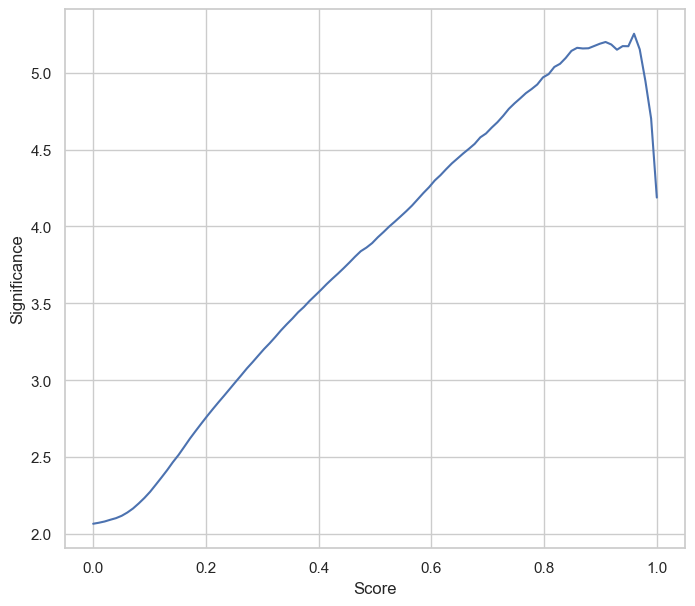

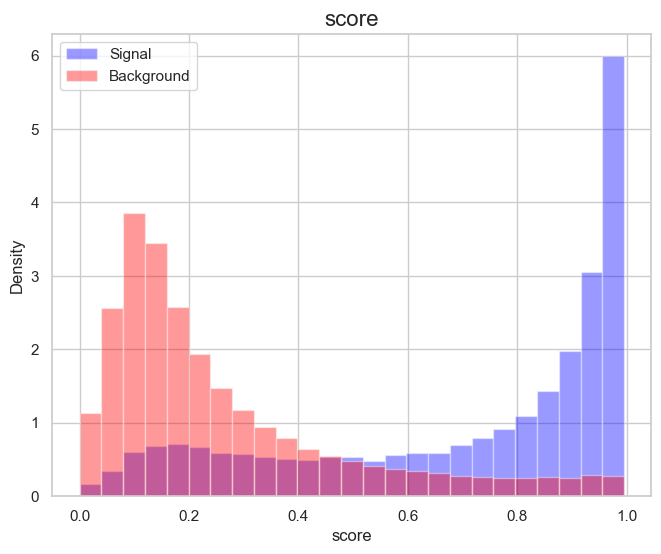

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


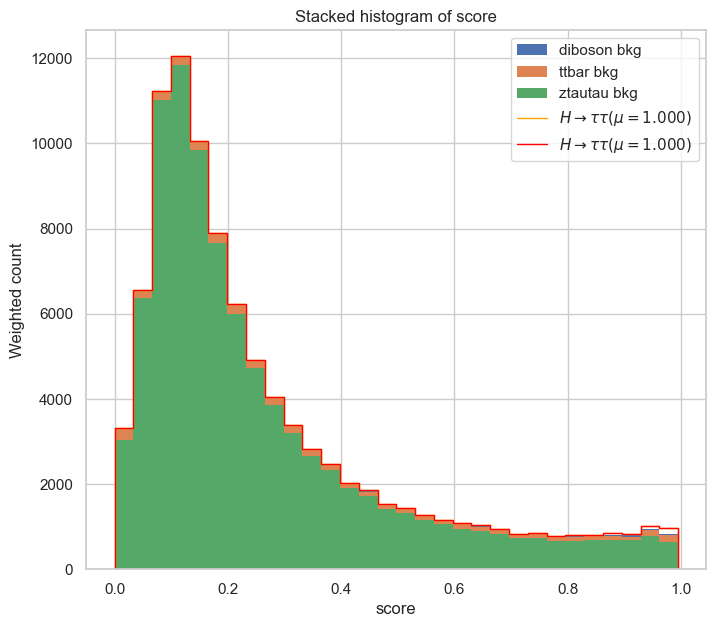

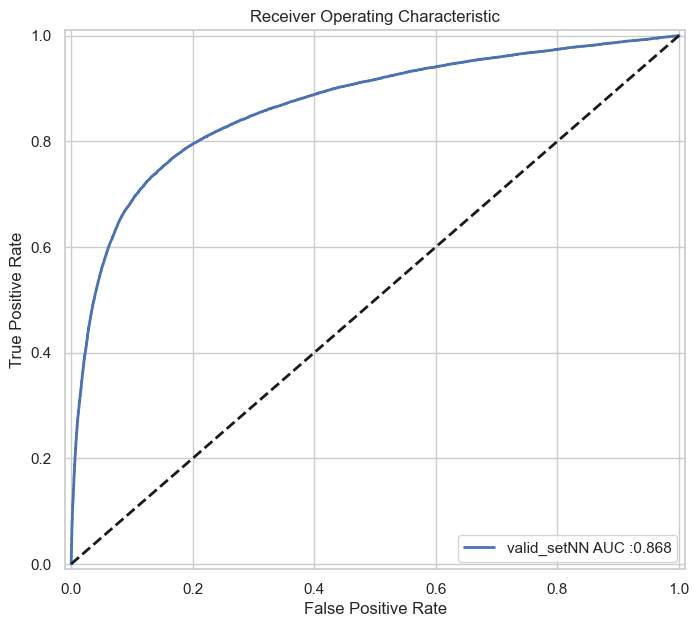

2025-06-05 20:37:59,903 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 20:37:59,917 - HiggsML.datasets     - INFO     - Selected train size: 100000


5.252366726690948


2025-06-05 20:38:00,374 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:38:00,415 - HiggsML.datasets     - INFO     - Selected train size: 100000


sum_signal_weights:  671.3891879578584
sum_bkg_weights:  105047.61081204214


2025-06-05 20:38:00,814 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:38:00,845 - HiggsML.datasets     - INFO     - Selected train size: 100000



Valid Data:  (100000, 28)
Valid Labels:  (100000,)
Valid Weights:  (100000,)
sum_signal_weights:  671.5915726700979
sum_bkg_weights:  105047.40842732994


2025-06-05 20:38:01,286 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:38:01,356 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



sum_signal_weights:  673.0211687936905
sum_bkg_weights:  105045.9788312063
 
 
Training Data:  (100000, 28)
DEBUG: model_type = 'NN'
 Model is NN
45
Epoch 1/45
6250/6250 - 13s - 2ms/step - accuracy: 0.8013 - loss: 0.9772
Epoch 2/45
6250/6250 - 12s - 2ms/step - accuracy: 0.8123 - loss: 0.9420
Epoch 3/45
6250/6250 - 12s - 2ms/step - accuracy: 0.8165 - loss: 0.9309
Epoch 4/45
6250/6250 - 11s - 2ms/step - accuracy: 0.8189 - loss: 0.9226
Epoch 5/45
6250/6250 - 11s - 2ms/step - accuracy: 0.8192 - loss: 0.9188
Epoch 6/45
6250/6250 - 11s - 2ms/step - accuracy: 0.8205 - loss: 0.9144
Epoch 7/45
6250/6250 - 11s - 2ms/step - accuracy: 0.8215 - loss: 0.9114
Epoch 8/45
6250/6250 - 11s - 2ms/step - accuracy: 0.8227 - loss: 0.9073
Epoch 9/45
6250/6250 - 11s - 2ms/step - accuracy: 0.8241 - loss: 0.9051
Epoch 10/45
6250/6250 - 11s - 2ms/step - accuracy: 0.8237 - loss: 0.9023
Epoch 11/45
6250/6250 - 11s - 2ms/step - accuracy: 0.8245 - loss: 0.8988
Epoch 12/45
6250/6250 - 11s - 2ms/step - accuracy: 0.825

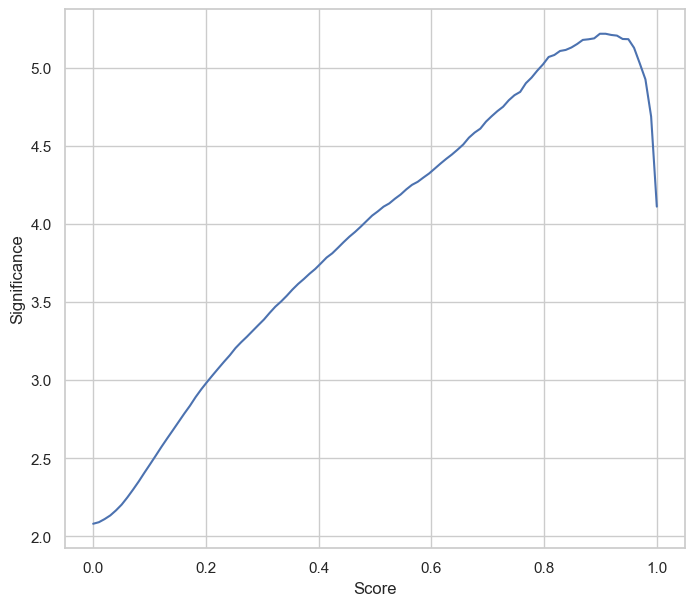

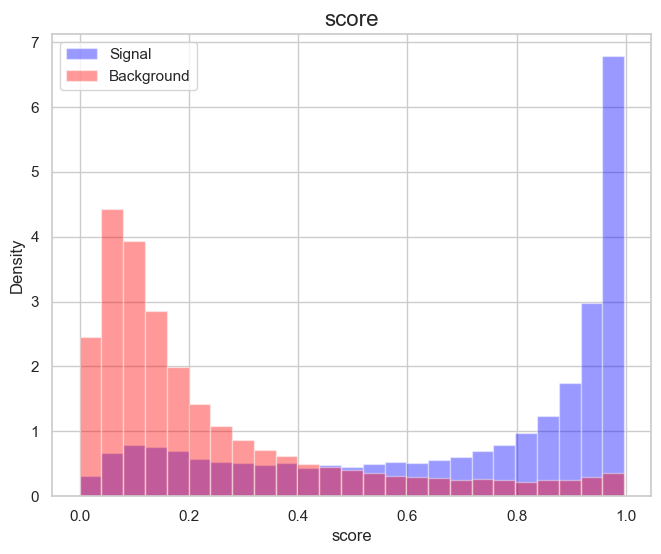

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


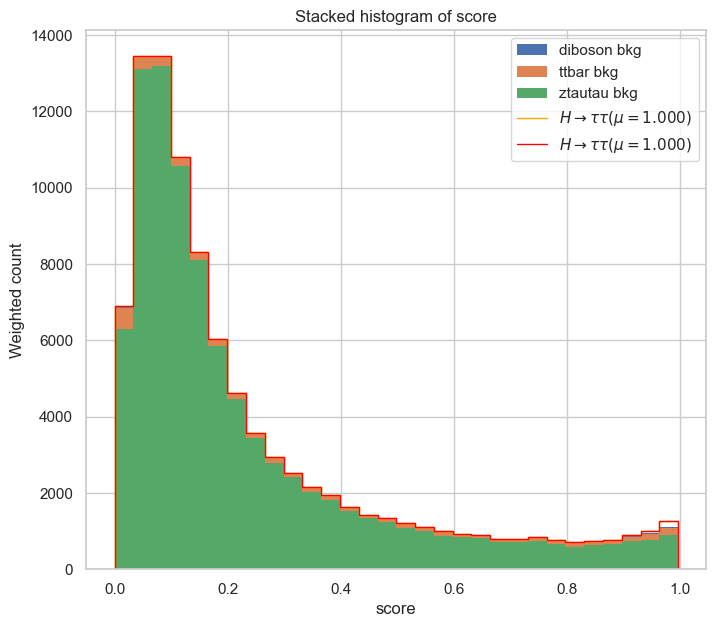

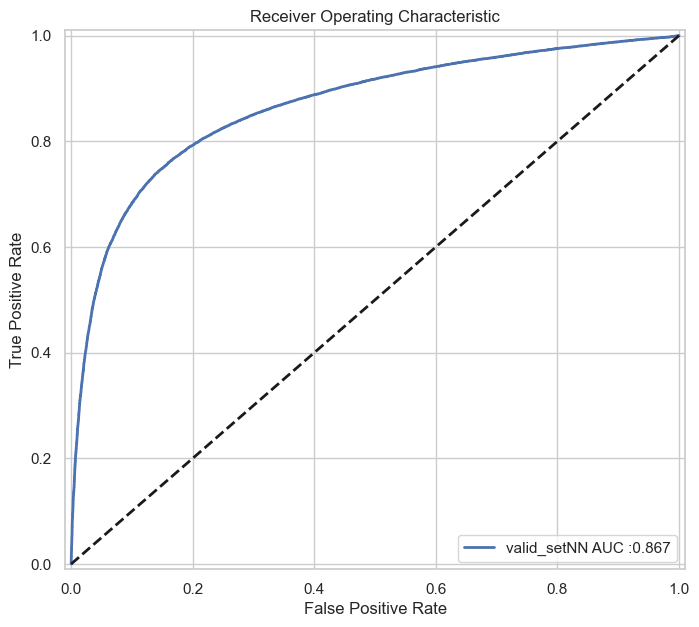

2025-06-05 20:46:54,834 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 20:46:54,847 - HiggsML.datasets     - INFO     - Selected train size: 100000


5.218551829168267


2025-06-05 20:46:55,348 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:46:55,387 - HiggsML.datasets     - INFO     - Selected train size: 100000


sum_signal_weights:  676.642490924407
sum_bkg_weights:  105042.35750907556


2025-06-05 20:46:55,853 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:46:55,901 - HiggsML.datasets     - INFO     - Selected train size: 100000



Valid Data:  (100000, 28)
Valid Labels:  (100000,)
Valid Weights:  (100000,)
sum_signal_weights:  670.1596965835292
sum_bkg_weights:  105048.84030341647


2025-06-05 20:46:56,318 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 20:46:56,397 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



sum_signal_weights:  669.2147480851978
sum_bkg_weights:  105049.78525191483
 
 
Training Data:  (100000, 28)
DEBUG: model_type = 'NN'
 Model is NN
50
Epoch 1/50
6250/6250 - 12s - 2ms/step - accuracy: 0.8023 - loss: 0.9807
Epoch 2/50
6250/6250 - 11s - 2ms/step - accuracy: 0.8130 - loss: 0.9452
Epoch 3/50
6250/6250 - 11s - 2ms/step - accuracy: 0.8157 - loss: 0.9354
Epoch 4/50
6250/6250 - 11s - 2ms/step - accuracy: 0.8179 - loss: 0.9274
Epoch 5/50
6250/6250 - 11s - 2ms/step - accuracy: 0.8192 - loss: 0.9226
Epoch 6/50
6250/6250 - 11s - 2ms/step - accuracy: 0.8198 - loss: 0.9188
Epoch 7/50
6250/6250 - 12s - 2ms/step - accuracy: 0.8213 - loss: 0.9148
Epoch 8/50
6250/6250 - 13s - 2ms/step - accuracy: 0.8216 - loss: 0.9124
Epoch 9/50
6250/6250 - 13s - 2ms/step - accuracy: 0.8218 - loss: 0.9097
Epoch 10/50
6250/6250 - 12s - 2ms/step - accuracy: 0.8235 - loss: 0.9067
Epoch 11/50
6250/6250 - 11s - 2ms/step - accuracy: 0.8238 - loss: 0.9049
Epoch 12/50
6250/6250 - 11s - 2ms/step - accuracy: 0.82

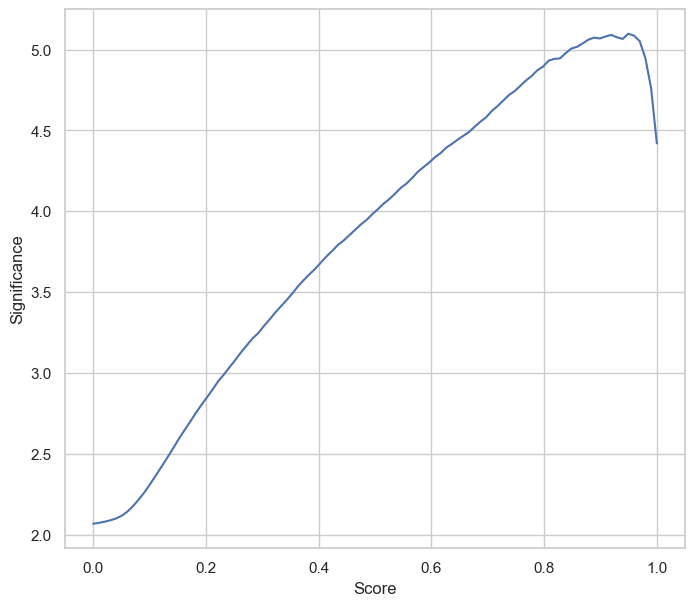

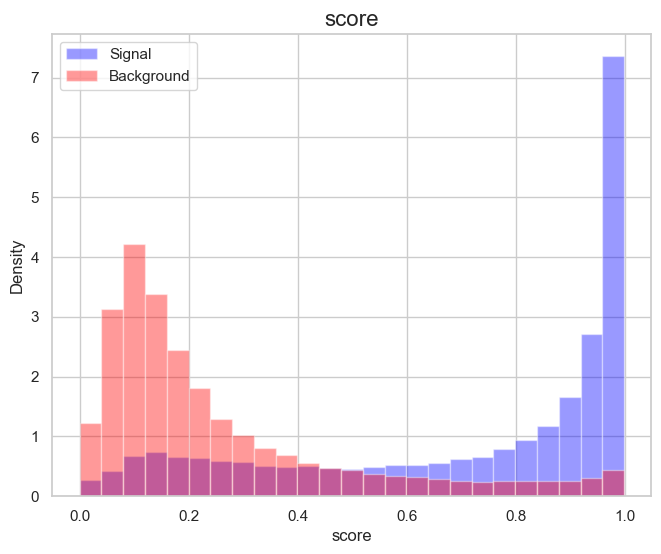

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


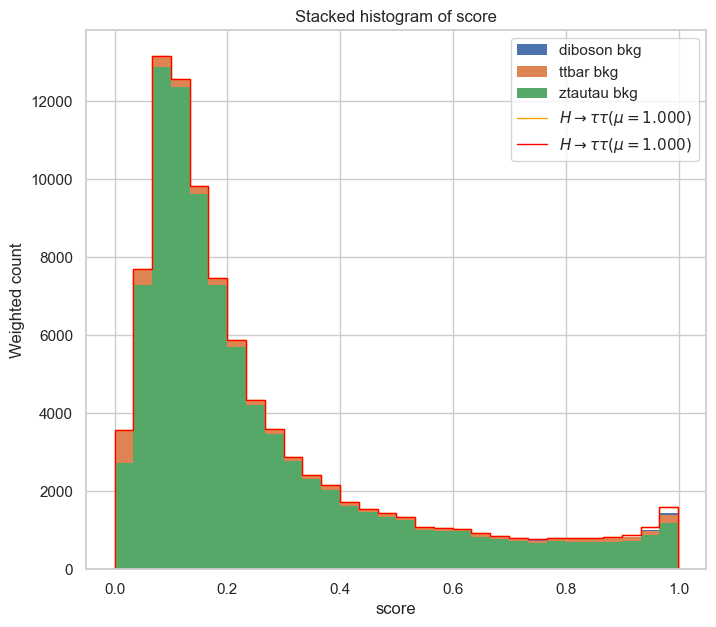

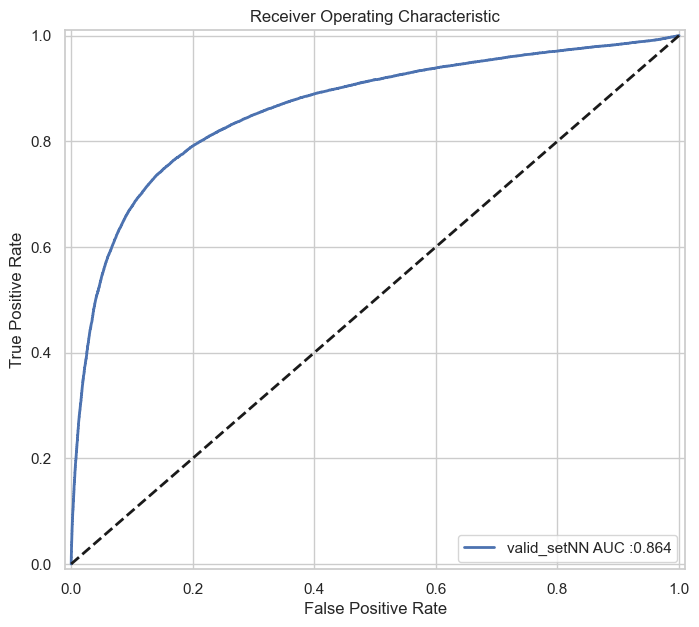

5.097907219440644


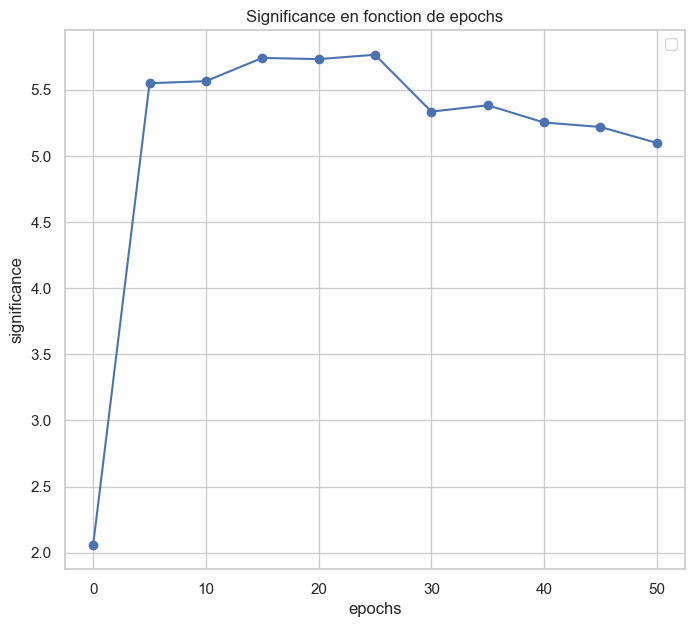

(np.float64(5.764439256672734), 25)

In [13]:
optimization(data_set)